<a href="https://colab.research.google.com/github/skumarudel/DSPS_SKumar/blob/master/HW2/MBoltzmannDistribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from __future__ import print_function, division
import numpy as np
import scipy as sp
from scipy import stats
import pandas as pd
import pylab as pl
%pylab inline
pl.style.use("https://raw.githubusercontent.com/fedhere/DSPS/master/fbb.mplstyle")


Populating the interactive namespace from numpy and matplotlib


# Homework 1: Maxwell Boltzmann distribution

In Physics, statistics can help us describe the macroscopic behavior of a system if we know its microscopic properties in a statistical sense. We cannot know the motion of each molecule in a gas, but we can know the distribution of their velocities and positions. In the mid to late 1800s, James Clerk Maxwell and Ludwig Boltzmann modeled the distribution of speed of molecules in a gas. As you probably know, and can intuitive realize, the speed of the molecules depends on the temperature of the gas, which is a macroscopic property, the velocity of the molecules is different for different gas temperatures. This distribution of velocities is called the Maxwell-Boltzmann distribution.

It turns out that the Maxwel-Boltzmann distribution is a special case of the [*Chi distribution*](https://en.wikipedia.org/wiki/Chi_distribution) with 3 degrees of freedom, and with a scale parameter corresponding to the temperature in some way. 


Below I have created 3 distributions. Based on the description above


# 1) label the axes in the plot

findfont: Font family ['["sans-serif"]'] not found. Falling back to DejaVu Sans.
findfont: Font family ['["sans-serif"]'] not found. Falling back to DejaVu Sans.
findfont: Font family ['["sans-serif"]'] not found. Falling back to DejaVu Sans.


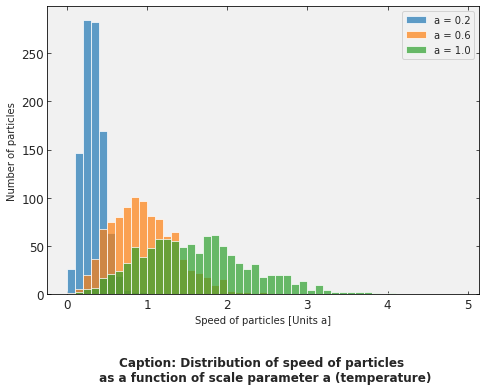

In [2]:
seed = int(123)
np.random.randn(seed)
fig = pl.figure()
ax = fig.add_axes((0,0.3,1,1))
for a in [0.2, 0.6, 1.0]:
    ax.hist(sp.stats.chi.rvs(df=3, scale=a, size=1000), # could as well be sp.stats.maxwell.rvs(scale=a, size=1000)
          bins=np.arange(0,5,0.1), alpha=0.7,
       label="a = %.1f"%a);

pl.legend()
caption = "Caption: Distribution of speed of particles \n as a function of scale parameter a (temperature)"
pl.figtext(0.5,0, caption, horizontalalignment='center', fontsize=12, fontweight='bold')
pl.xlabel('Speed of particles [Units a]')
pl.ylabel('Number of particles');




# 2) knowing that the *scale* parameter $a$  is a function of the temperature  *T*, and that the dependency is to a power 1/2, which is correct:
   **$a \propto \sqrt{T}$**  or **$a \propto \sqrt{1/T}$**? 

   (in other words, is the dependency on the root of the temperature or on the inverse root of the temperature ?)
 

 

**Answer:** The scale parameter relation is given by **$a \propto \sqrt{T}$**. This is evident from the figure also becasue as the scale parameter increases which means as temperature increases, the peak (most probable value) of the distribution moves to the higher value of speed.


# 3) What is the mean of all three distributions. How does it compare to the most probable molecular speed? 
From the wikipedia page of the Chi distribution find the formula of the mean of the Chi distribution. The distribution we are using has a scale parameter *a* in addition to the number of degrees of freedom. The mean scales linearly with this parameter:

$\mu_{\mathrm{MB}, k, a} = a \cdot \mu_{\mathrm{chi}, k}$

Using the scipy function ```sp.special.gamma()```  calculate the gamma $\Gamma$ function,

**calculate the mean of all three distributions. Compare it with the mean of the empirical distributions I generated in step 1. How does this mean compare to the most probable molecular speed.**

In [3]:
# Function to calculate mean of chi distribution with input parameters as dof and scale
def mean_chi(dof, scale):
  n = dof+1
  return scale * np.sqrt(2) * sp.special.gamma(n/2) / sp.special.gamma((n-1)/2)

dictt = {}  # Dictionary to hold values of mean and mode
DOF = 3
i = 0
np.random.seed(seed)
for a in [0.2,0.6,1.0]:
  empirical_mean = sp.stats.chi.rvs(df=DOF,scale=a,size=1000).mean()
  mode = np.sqrt(2) * a   # From wiki page, Mode = sqrt(2) * scale
  dictt['Distribution_{}'.format(i)] = [DOF,a,  mean_chi(DOF,a), mode, empirical_mean]
  i = i+1


df = pd.DataFrame.from_dict(dictt, orient='index', columns=[["Degree_of_freedom", 'scale_parameter', "theoretical_mean", "most_probable_value (mode)", "empirical_mean"]])
df

,Degree_of_freedom,scale_parameter,theoretical_mean,most_probable_value (mode),empirical_mean
Distribution_0,3,0.2,0.319154,0.282843,0.323249
Distribution_1,3,0.6,0.957461,0.848528,0.955791
Distribution_2,3,1.0,1.595769,1.414214,1.637743


**Answer:** The theoretical mean of all three distributions are given in the third column of the dataframe. You can see that the theoretical mean and the empirical mean (calculated from random data generated in first plot) are almost same within some errors. The most probable value is always less than the mean of the distribution. This is due to the fact that chi distribution is assymetric to the right and that pull the mean to higher value than the mode.